In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy.io.netcdf as sp

import netCDF4 as nc

from google.colab import drive
drive.mount('/content/drive')

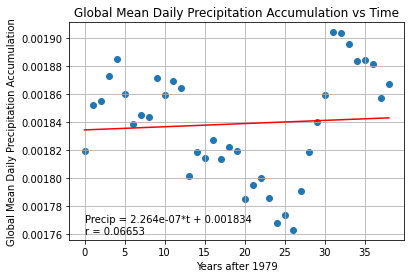

In [ ]:
# This script creates a scatter plot of the global mean daily precipitation by year

# Open the dataset file
f = nc.Dataset('/content/drive/Shared drives/Research Project Data/CSATS/tp.daily_accumulation.1979-2017.nc', 'r')

# Make variables to store all the precipitation and latitude values
precip = f.variables['tp'][:]
lat = f.variables['latitude'][:]

# Calculate how many full years of data are in the dataset
numYears = precip.shape[0] // 365

# Create an array that stores a value for each year after 1979, with the year 1979 at index 0
years = np.arange(numYears)

# Create an array, with 0s as placeholders, that will be used to store the global mean daily precipitation of each year
yearlyGlobalMeanPrecip = np.zeros(numYears)

# Loop through each year and calculate the global mean precipitation during that time
for i in range(numYears):
    # Decide how many days were in the current year (first year: 1979)
    numDaysInYear = 365
    if ((i - 1) % 4 == 0):
        numDaysInYear = 366
    
    # Store one year of precipitation data
    oneYearPrecip = precip[(i * numDaysInYear):(i * numDaysInYear + numDaysInYear), :, :]
    
    # Average the data at each location across all 12 months
    meanYearPrecip = oneYearPrecip.mean(axis=0)
    
    # Average the data all longitude coordinates
    meanYearLonPrecip = meanYearPrecip.mean(axis=1)
    
    # Weight the data depending on its latitude coordinates, with data from locations farther from the equator given less weight since it represents a smaller area
    for j in range(lat.shape[0]):
        meanYearLonPrecip[j] *= np.cos(lat[j] * np.pi/180)
    
    # Average the data across all latitude coordinates
    yearlyGlobalMeanPrecip[i] = meanYearLonPrecip.mean(axis=0)

# Calculate the slope, y-intercept, and correlation coefficient of the best-fit line through the temperature-vs-time points
m, b = np.polyfit(years, yearlyGlobalMeanPrecip, 1)
r = np.corrcoef(years, yearlyGlobalMeanPrecip)[0,1]

# Create a scatter plot of the global mean ISR values over time, and then plot the best-fit line through the points
plt.scatter(years, yearlyGlobalMeanPrecip)
plt.plot(years, m * years + b, color='red')

# Adjust the viewing window of the graph, and place a text box containing the equation of the best-fit line and value of the correlation coefficient.
#plt.axis([0, 20, 0, 400])
plt.text(0, 0.00176, 'Precip = ' + f'{m:.4g}' + '*t + ' + f'{b:.4g}' + '\nr = ' + f'{r:.4g}')

# Add a title and labels to the horizontal and vertical axes. Then adjust how many ticks are on the horizontal axis and add gridlines.
plt.title('Global Mean Daily Precipitation Accumulation vs Time')
plt.xlabel('Years after 1979')
plt.ylabel('Global Mean Daily Precipitation Accumulation')
plt.grid()

# Save a PNG image of the graph
plt.savefig('/content/drive/My Drive/Research Project for CSATS/Precip-Year_Graph.png', bbox_inches='tight', dpi=200)